<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/map_projection_coordinate_ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Map Projection and Coordinate Reference Systems

Zia Ahmed

## Map Projection

Map projection is a method used to represent the three-dimensional
surface of the Earth on a two-dimensional map. Since the Earth is a
spherical object, it is challenging to depict its curved surface
accurately on a flat surface. This problem arises because representing
the entire curved surface of the Earth on a flat map results in
distortions in shape, size, distance, or direction.

Various map projections are available, each designed to address
different needs and minimize certain types of distortion. Here are some
common types of map projections:

**Mercator Projection**: Developed by Gerardus Mercator in the 16th century,
this projection preserves straight lines, making it useful for marine
navigation. However, it distorts the sizes of landmasses, with areas
near the poles appearing significantly more significant than they are.

**Robinson Projection**: This compromise projection attempts to balance
distortions in size, shape, and distance across the entire map. It's
commonly used for world maps.

**Conic Projection**: This projection involves projecting the Earth's
surface onto a cone and then unrolling the cone to form a flat map. It
preserves shapes and distances well within the area of the cone but can
have significant distortions as one moves away from that central area.

**Cylindrical Projection**: This projection wraps the Earth's surface around
a cylinder. Examples include the Mercator projection mentioned earlier
and the Miller projection, which preserves relative size but distorts
shapes.

**Azimuthal Projection**: These projections project the Earth's surface onto
a plane from a specific point on the Earth's surface. They preserve
directionality but can have considerable distortions in other aspects.

**Goode's Homolosine Projection**: This projection combines the sinusoidal
and Mollweide projection to reduce size distortion in landmasses,
although it sacrifices shape accuracy.

The choice of map projection depends on the intended use of the map, the
area being represented, and the extent to which certain distortions are
acceptable. No single projection can perfectly represent the entire
Earth without any distortions, and mapmakers must make trade-offs based
on their specific needs.

It's important to understand that map projections are just one aspect of
cartography, and producing accurate and useful maps often involves other
techniques, such as generalization, symbolization, and labeling.




## Coordinate Reference Systems

Coordinate Reference Systems (CRS) are used in cartography, geography,
and GIS (Geographic Information Systems) to define the positions of
points, lines, and areas on the Earth's surface. A CRS provides a
framework for translating geographic locations, which are expressed as
latitude and longitude or other coordinate values, into a specific
location on a map or a two-dimensional plane.

There are two main types of Coordinate Reference Systems:

1.  Geographic Coordinate Systems (GCS): Geographic Coordinate Systems
    use latitude and longitude to define locations on the Earth's
    surface. Latitude measures the north-south position, while longitude
    measures the east-west position. The coordinates are expressed in
    degrees, minutes, and seconds or decimal degrees. Common GCS
    examples include WGS 84 (World Geodetic System 1984) and NAD83
    (North American Datum 1983).

2.  Projected Coordinate Systems (PCS): Projected Coordinate Systems use
    Cartesian coordinates (X, Y) to represent locations on a flat,
    two-dimensional map. The projection converts the three-dimensional
    geographic coordinates (latitude, longitude, and often elevation)
    into these two-dimensional coordinates. Different map projections,
    such as Mercator, Robinson, or UTM (Universal Transverse Mercator),
    create projected coordinate systems.


  

CRS also involves datum, which defines the reference frame for the
coordinate system. A datum consists of an origin point, orientation, and
scale that serves as a starting point for the coordinates. Common datums
include WGS 84, NAD27 (North American Datum 1927), and ED50 (European
Datum 1950).

To maintain accuracy in GIS and cartographic applications, it's
essential to use the appropriate coordinate reference system and datum
for the specific region or project. Choosing the wrong CRS can lead to
distortions and inaccuracies when transforming between geographic
locations and map coordinates.

CRS is a fundamental aspect of spatial data management, as they allow
for the integration of different data sources, analysis, and
visualization of geographic information consistently and meaningfully.
Understanding CRS is crucial for cartographers, GIS analysts, and anyone
working with geographic data to ensure accurate spatial representation
and analysis.




## The World Geodetic system 84

The World Geodetic System 1984 (WGS 84) is a global geodetic reference system developed and maintained by the United States Department of Defense (DoD). It is widely used as the standard coordinate reference system for the Earth's surface in various applications, including mapping, navigation, surveying, and GPS (Global Positioning System).

WGS 84 is an Earth-centered, Earth-fixed coordinate system known as a geocentric coordinate system. It defines a three-dimensional model of the Earth, where the center of the Earth serves as the origin, and the X, Y, and Z axes are oriented with respect to the Earth's rotation and equator.

The key features of WGS 84 include:

1.  Ellipsoid: WGS 84 uses the WGS 84 ellipsoid, a mathematically defined surface approximating the shape of the Earth. It is an oblate spheroid, slightly flattened at the poles and bulging at the equator.

2.  Datum: WGS 84 defines a specific datum, which includes the ellipsoid's size, shape, and orientation in relation to the Earth's center. The datum is a reference frame for measuring positions on the Earth's surface.

3.  Coordinate Units: WGS 84 uses degrees of latitude and longitude to express geographic positions. Latitude measures the north-south position, and longitude measures the east-west position.

4.  GPS Reference Frame: WGS 84 is the coordinate system used by the Global Positioning System (GPS). GPS receivers use WGS 84 to accurately determine the user's position on the Earth's surface.

5.  Constantly Updated: The WGS 84 reference frame is continuously refined and updated to account for crustal movements, which can affect the Earth's shape and position. As such, newer versions of WGS 84 have been released, with slight adjustments to improve accuracy.

The adoption of WGS 84 as a global standard has been instrumental in enabling accurate navigation, mapping, and geospatial data exchange across the world. It ensures consistency and interoperability among different mapping and navigation systems, making it possible to integrate data from various sources into a coherent spatial framework.

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp310-cp310-linux_x86_64.whl


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install Packages

In [ ]:
%%R
install.packages(c('rgdal','maptools', 'raster', 'sf ), lib='drive/My Drive/R/')

### Load library

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library(raster)
library (rgdal)
library(sf)
library(maptools)

## Vector Data

We will use raj_district_GCS shape files to check, define projection. First,   we will  **st_read()** from sf package to load shape file from github using "vsicurl". Or you can  use read from  your gool drive using **shapefile()**

In [4]:
%%R
# reading shape file with raster or rgdal package from google drive
#dist.GCS<-rgdal::readOGR("/content/drive/MyDrive/Data/Bangladesh/Shapefiles/raj_district_GCS.shp")
dist.GCS<-raster::shapefile('/content/drive/MyDrive/Data/Bangladesh/Shapefiles/raj_district_GCS.shp')
# Reading shape file  sf package from github
dist.GCS.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_district_GCS.shp")

### Check Projection

We can check current CRS of dist.CGS objects using proj4string() or st_crs() of sf pcakages function:

In [6]:
%%R
print(proj4string(dist.GCS))

[1] NA


In [8]:
%%R
st_crs(dist.GCS)

Coordinate Reference System: NA


You notice that **.prj** file is not associated with this shape file.

We know that raj_district_GCS.shp  file is in geographic coordinate system. We can check it coordinates system with **summary()** function.

In [9]:
%%R
summary(dist.GCS)

Object of class SpatialPolygonsDataFrame
Coordinates:
       min      max
x 88.00863 89.82498
y 23.80807 25.27759
Is projected: NA 
proj4string : [NA]
Data attributes:
   Shape_Leng      Shape_Area        ADM2_EN           ADM2_PCODE       
 Min.   :2.215   Min.   :0.08593   Length:8           Length:8          
 1st Qu.:3.267   1st Qu.:0.16470   Class :character   Class :character  
 Median :3.479   Median :0.21462   Mode  :character   Mode  :character  
 Mean   :3.571   Mean   :0.20311                                        
 3rd Qu.:3.769   3rd Qu.:0.23152                                        
 Max.   :5.098   Max.   :0.30773                                        
   ADM2_REF          ADM2ALT1EN         ADM2ALT2EN          ADM1_EN         
 Length:8           Length:8           Length:8           Length:8          
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
             

### Define CRS

You notice that county shape file read as **SpatialPolygonsDataFrame** in R, and it's x-coordinate is from  88.00863 to 89.82498 and y-cordinate  23.80807 to  25.27759 and CRS has not been be defined yet (**Is projected: NA and proj4string : \[NA\]**) and **.PRJ** file is missing. So you need to define its current CRS (**WGS 1984 or EPSG:4326**) before you do any further analyses like re-projection etc.

We use either of following function to define it's CRS.

In [11]:
%%R
proj4string(dist.GCS) = CRS("+proj=longlat +ellps=WGS84")
# or
#proj4string(dist.GCS) <- CRS("+init=epsg:4326")


A new CRS, **WGS 1984** has been assigned to the shape file. You can check it again with **st_crs()** functions.



In [14]:
%%R
st_crs(dist.GCS)

Coordinate Reference System:
  User input: +proj=longlat +ellps=WGS84 +no_defs 
  wkt:
GEOGCRS["unknown",
    DATUM["Unknown based on WGS84 ellipsoid",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1],
            ID["EPSG",7030]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433],
        ID["EPSG",8901]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]]


However, you need to save the file to make it permanent. You can use either,  will use **writeOGR()** function of **rgdal** package or **shapefile()** function of raster package or **st_write()**  function  of sf  to save it. It is a good practice to write a file with it's current CRS. After running this function, you can see a file named **raj_district_GCS.prj** has created in your working directory.

In [18]:
%%R
shapefile("/content/drive/MyDrive/Data/Bangladesh/Shapefiles/raj_district_GCS.shp", overwrite=TRUE)

class       : SpatialPolygonsDataFrame 
features    : 8 
extent      : 88.00863, 89.82498, 23.80807, 25.27759  (xmin, xmax, ymin, ymax)
crs         : +proj=longlat +ellps=WGS84 +no_defs 
variables   : 14
names       :    Shape_Leng,      Shape_Area,   ADM2_EN, ADM2_PCODE, ADM2_REF, ADM2ALT1EN, ADM2ALT2EN,  ADM1_EN, ADM1_PCODE,    ADM0_EN, ADM0_PCODE,       date,    validOn, ValidTo 
min values  : 2.21495685732, 0.0859341926695,     Bogra,     BD5010,       NA,         NA,         NA, Rajshahi,       BD50, Bangladesh,         BD, 2015/01/01, 2020/11/13,      NA 
max values  : 5.09805191946,  0.307727590076, Sirajganj,     BD5088,       NA,         NA,         NA, Rajshahi,       BD50, Bangladesh,         BD, 2015/01/01, 2020/11/13,      NA 


### Reprojection

The **spTransform** function provide transformation between datum(s) and conversion between projections (also known as projection and/or re-projection) from one specified coordinate reference system to another. For simple projection, when no **+datum** tags are used, datum projection does not occur. When datum transformation is required, the **+datum** tag should be present with a valid value both in the CRS of the object to be transformed, and in the target CRS. In general **+datum=** is to be preferred to **+ellps=**, because the datum always fixes the ellipsoid, but the ellipsoid never fixes the datum.

We will transform the shape file to Bangladesh Transverse Mercator [(EPSG:9677)](https://epsg.io/9677)

Projection parameter of Bangladesh Transverse Mercator

> "proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000"


In [30]:
%%R
btm = CRS("+proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000")
# define new projection
dist.PROJ<- spTransform(dist.GCS,   # Input data
		          btm)
summary(dist.PROJ)

Object of class SpatialPolygonsDataFrame
Coordinates:
       min      max
x 298487.8 482210.3
y 633043.0 796039.8
Is projected: TRUE 
proj4string :
[+proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000
+datum=WGS84 +units=m +no_defs]
Data attributes:
   Shape_Leng      Shape_Area        ADM2_EN           ADM2_PCODE       
 Min.   :2.215   Min.   :0.08593   Length:8           Length:8          
 1st Qu.:3.267   1st Qu.:0.16470   Class :character   Class :character  
 Median :3.479   Median :0.21462   Mode  :character   Mode  :character  
 Mean   :3.571   Mean   :0.20311                                        
 3rd Qu.:3.769   3rd Qu.:0.23152                                        
 Max.   :5.098   Max.   :0.30773                                        
   ADM2_REF          ADM2ALT1EN         ADM2ALT2EN          ADM1_EN         
 Length:8           Length:8           Length:8           Length:8          
 Class :character   Class :character   Class :character   Class :chara

We notice that x and y -coordinates converted from degree-decimal to meter and **Is projected: TRUE**.

Or we can also use st_transform to st object to  re-project the shape

In [24]:
%%R
dist.GCS.st = sf::st_read('/content/drive/MyDrive/Data/Bangladesh/Shapefiles/raj_district_GCS.shp')
st_transform(dist.GCS.st, crs=btm)

Reading layer `raj_district_GCS' from data source 
  `/content/drive/MyDrive/Data/Bangladesh/Shapefiles/raj_district_GCS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 14 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 88.00863 ymin: 23.80807 xmax: 89.82498 ymax: 25.27759
Geodetic CRS:  GCS_unknown
Simple feature collection with 8 features and 14 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 633043 xmax: 482210.3 ymax: 796039.8
Projected CRS: PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6326]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8901]]],
    CONVERSION["unknown",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natur

ow plot WWGS 1984 and BTM projected map site by site.

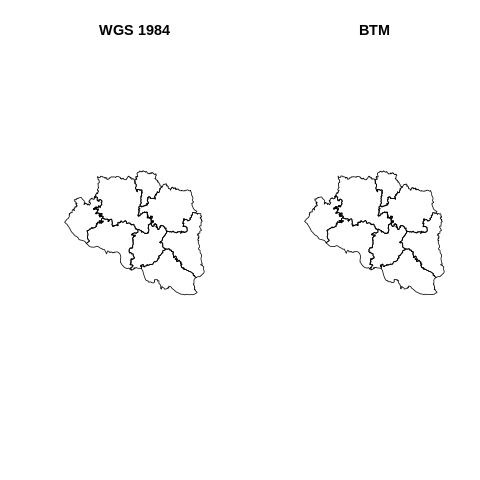

In [27]:
%%R
par(mfrow=c(1,2))
plot(dist.GCS, main="WGS 1984")
plot(dist.PROJ, main="BTM")
par(mfrow=c(1,1))

We can save (write) this file as an ESRI shape with **writeOGR()** or **shapefile()** or **st_write()** function for future use.

In [29]:
%%R
shapefile(dist.PROJ, "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/raj_district_BUTM.shp",overwrite=TRUE)

## Raster Data

In this exercise, we will use SRTM 90 digital Elevation Model New York State which was downloaded from [CGIAR-CSI](http://www.cgiar-csi.org/data/srtm-90m-digital-elevation-database-v4-1). We will re-project it from WSG84 coordinate to Albers Equal Area Conic NAD83 projection system. In R, you can re-project a single or multiple raster in a batch mode.

### Projection of a Single Raster

First, we will re-project DEM raster data from WGS 1984 CRS to BUTM projection system. You can load DEM raster in R using **raster()** function of **raster** package. If you want to check raster attribute, just simple type r-object name of this raster or use **crs()** function.

In [32]:
%%R
DEM.GCS<-raster("/content/drive/MyDrive/Data/Bangladesh/Raster/raj_DEM_GCS.tif")
DEM.GCS
# Or
crs(DEM.GCS)

Coordinate Reference System:
Deprecated Proj.4 representation: +proj=longlat +datum=WGS84 +no_defs 
WKT2 2019 representation:
GEOGCRS["unknown",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ID["EPSG",6326]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433],
        ID["EPSG",8901]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]] 


You notice that CRS of this DEM has already been defined as **WGS 84**. Now, we will project from **WGS 84** to **BTM**. We will use **projectRaster()** function with proj.4 projection description of **Albers Equal Area Conic NAD83**. Be patient, it will take a while to project this DEM data.

In [37]:
%%R
DEM.PROJ<-projectRaster(DEM.GCS, crs=btm)
DEM.PROJ

class      : RasterLayer 
dimensions : 640, 783, 501120  (nrow, ncol, ncell)
resolution : 241, 264  (x, y)
extent     : 294912.3, 483615.3, 629891.1, 798851.1  (xmin, xmax, ymin, ymax)
crs        : +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : Band_1 
values     : -7.961437, 52.49213  (min, max)



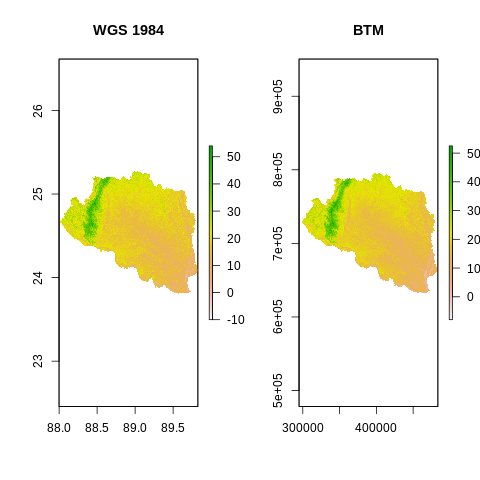

In [38]:
%%R
par(mfrow=c(1,2))
plot(DEM.GCS, main="WGS 1984")
plot(DEM.PROJ, main="BTM")
par(mfrow=c(1,1))

Now we will save this projected raster using **writeRaster()** function of raster package

In [41]:
%%R
writeRaster(DEM.PROJ,                                                                  # Input raster
            '/content/drive/MyDrive/Data/Bangladesh/Raster/raj_DEM_BTM.tif',        # output folder and output raster
            "GTiff",                                                                   # output raster file extension
             overwrite=TRUE)

### Batch Projection of Multiple Raster

In this exercise will project DEM raster of eight divisions in a loop. First, we will create a list of raster using **list.files()** function and then will create output raster using **gsub()** function

In [34]:
%%R
DEM.input <- list.files(path= '/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM',pattern='.tif$',full.names=T)
DEM.input
# Output raster names
DEM.output <- gsub("\\.tif$", "_PROJ.tif", DEM.input)
DEM.output

 [1] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/barisal_dem_PROJ_PROJ.tif"    
 [2] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/barisal_dem_PROJ.tif"         
 [3] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/chittagoang_dem_PROJ_PROJ.tif"
 [4] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/chittagoang_dem_PROJ.tif"     
 [5] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/dhaka_dem_PROJ_PROJ.tif"      
 [6] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/dhaka_dem_PROJ.tif"           
 [7] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/khulna_dem_PROJ_PROJ.tif"     
 [8] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/khulna_dem_PROJ.tif"          
 [9] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/mymenshingl_dem_PROJ_PROJ.tif"
[10] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/mymenshingl_dem_PROJ.tif"     
[11] "/content/drive/MyDrive/Data/Bangladesh/Raster/BD_DEM/rajshahi_dem_PROJ_PROJ.tif"   
[12] "/con

We will define proj.4 projection description of **BTM** as a mew projection and run **projectRaster()** function in a loop

In [35]:
%%R
newproj <- "+proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=0 +datum=WGS84 +units=m +no_defs"
# Reprojection and write raster
for (i in 1:8){
    r <- raster(DEM.input[i])
    PROJ <- projectRaster(r, crs=newproj, method = 'bilinear', filename = DEM.output[i], overwrite=TRUE)
}


### Further Reading

1. [Using map projections](https://cran.r-project.org/web/packages/oce/vignettes/D_map_projections.html)

2. [Map Projections in R](https://michaelminn.net/tutorials/r-projections/index.html)

3. [Variations on map projections in R](https://www.happykhan.com/posts/map-projections-in-r/ )